#### IMPORTS

In [4]:
import torch
import numpy as np

from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim

import os
from model_nn import  Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
default_dir = os.getcwd()
def default_directory():
    os.chdir(f"{default_dir}")
    print(f"you are back to the default directory: {default_dir}")


In [3]:
default_directory()
os.getcwd()

you are back to the default directory: d:\LARGE_CNN\ECG_ML\MAIN


'd:\\LARGE_CNN\\ECG_ML\\MAIN'

In [4]:
os.chdir("zenodo_data\cg_16")
os.getcwd()

'd:\\LARGE_CNN\\ECG_ML\\MAIN\\zenodo_data\\cg_16'

#### LOAD DATA

In [5]:
# all files in the directory
os.listdir()

['disease_1dAVB_svd_zenedo_cg_16_0.txt',
 'disease_1dAVB_svd_zenedo_cg_16_1.txt',
 'disease_1dAVB_svd_zenedo_cg_16_2.txt',
 'disease_1dAVB_svd_zenedo_cg_16_3.txt',
 'disease_1dAVB_svd_zenedo_cg_16_4.txt',
 'disease_1dAVB_svd_zenedo_cg_16_5.txt',
 'disease_1dAVB_svd_zenedo_cg_16_6.txt',
 'disease_1dAVB_svd_zenedo_cg_16_7.txt',
 'disease_1dAVB_svd_zenedo_cg_16_8.txt',
 'disease_1dAVB_svd_zenedo_cg_16_9.txt',
 'disease_AF_svd_zenedo_cg_16_0.txt',
 'disease_AF_svd_zenedo_cg_16_1.txt',
 'disease_AF_svd_zenedo_cg_16_2.txt',
 'disease_AF_svd_zenedo_cg_16_3.txt',
 'disease_AF_svd_zenedo_cg_16_4.txt',
 'disease_AF_svd_zenedo_cg_16_5.txt',
 'disease_AF_svd_zenedo_cg_16_6.txt',
 'disease_AF_svd_zenedo_cg_16_7.txt',
 'disease_AF_svd_zenedo_cg_16_8.txt',
 'disease_AF_svd_zenedo_cg_16_9.txt',
 'disease_LBBB_svd_zenedo_cg_16_0.txt',
 'disease_LBBB_svd_zenedo_cg_16_1.txt',
 'disease_LBBB_svd_zenedo_cg_16_2.txt',
 'disease_LBBB_svd_zenedo_cg_16_3.txt',
 'disease_LBBB_svd_zenedo_cg_16_4.txt',
 'disease_

### 3 classes only

In [6]:
data_1dAVB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_1dAVB_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_1dAVB_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data 1dAVB of length {len(cc)} in {i} index loaded")
print(data_1dAVB_list[0].shape)

# data_AF_list=[]
# for i in range(10):
#     cc = np.loadtxt('disease_AF_svd_zenedo_cg_16_'+str(i)+'.txt')
#     data_AF_list.append(cc)
#     if i==0:
#         print(cc.shape)
#     print(f"data AF of length {len(cc)} in {i} index loaded")
# print(data_AF_list[0].shape)

data_LBBB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_LBBB_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_LBBB_list.append(cc)
    
    print(cc.shape)
    print(f"data LBBB of length {len(cc)} in {i} index loaded")
print(data_LBBB_list[0].shape)

# data_normal_list=[]
# for i in range(10):
#     cc = np.loadtxt('disease_normal_svd_zenedo_cg_16_'+str(i)+'.txt')
#     data_normal_list.append(cc)
#     if i==0:
#         print(cc.shape)
#     print(f"data normal of length {len(cc)} in {i} index loaded")
# print(data_normal_list[0].shape)

data_RBBB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_RBBB_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_RBBB_list.append(cc)

    print(cc.shape)
    print(f"data RBBB of length {len(cc)} in {i} index loaded")
print(data_RBBB_list[0].shape)

# dat_SB_list=[]
# for i in range(10):
#     cc = np.loadtxt('disease_SB_svd_zenedo_cg_16_'+str(i)+'.txt')
#     dat_SB_list.append(cc)
#     if i==0:
#         print(cc.shape)
#     print(f"data SB of length {len(cc)} in {i} index loaded")
# print(dat_SB_list[0].shape)

# data_ST_list=[]
# for i in range(10):
#     cc = np.loadtxt('disease_ST_svd_zenedo_cg_16_'+str(i)+'.txt')
#     data_ST_list.append(cc)
#     if i==0:
#         print(cc.shape)
#     print(f"data ST of length {len(cc)} in {i} index loaded")
# print(data_ST_list[0].shape)


(500, 65536)
data 1dAVB of length 500 in 0 index loaded
(500, 65536)
data 1dAVB of length 500 in 1 index loaded
(500, 65536)
data 1dAVB of length 500 in 2 index loaded
(500, 65536)
data 1dAVB of length 500 in 3 index loaded
(500, 65536)
data 1dAVB of length 500 in 4 index loaded
(500, 65536)
data 1dAVB of length 500 in 5 index loaded
(500, 65536)
data 1dAVB of length 500 in 6 index loaded
(500, 65536)
data 1dAVB of length 500 in 7 index loaded
(500, 65536)
data 1dAVB of length 500 in 8 index loaded
(500, 65536)
data 1dAVB of length 500 in 9 index loaded
(500, 65536)
(500, 65536)
data LBBB of length 500 in 0 index loaded
(500, 65536)
data LBBB of length 500 in 1 index loaded
(500, 65536)
data LBBB of length 500 in 2 index loaded
(500, 65536)
data LBBB of length 500 in 3 index loaded
(500, 65536)
data LBBB of length 500 in 4 index loaded
(500, 65536)
data LBBB of length 500 in 5 index loaded
(500, 65536)
data LBBB of length 500 in 6 index loaded
(500, 65536)
data LBBB of length 500 in 7 

<module 'torch.optim' from 'c:\\Users\\Guest1\\anaconda3\\Lib\\site-packages\\torch\\optim\\__init__.py'>

In [10]:
common_count = sum(
    np.array_equal(matrix1, matrix2)
    for matrix1 in data_RBBB_list
    for matrix2 in data_1dAVB_list
)

print("Number of common 2D matrices:", common_count)

Number of common 2D matrices: 0


In [12]:
labels=np.concatenate((np.zeros(5000),np.ones(5000),2*np.ones(500*10)))
images=np.concatenate((data_1dAVB_list,data_LBBB_list,data_RBBB_list))
del data_1dAVB_list,data_LBBB_list,data_RBBB_list
default_directory()
print(len(images),len(labels))
print(images.shape)
images = images.reshape(15000,1,256,256)
images.shape



NameError: name 'data_1dAVB_list' is not defined

#### CREATE BATCHES

In [13]:
# Create an instance of your dataset

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [14]:
images_train.shape

(12000, 1, 256, 256)

#### TRAINING PARAMETERS

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F



class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        
        # Convolutional layers with reduced filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers with reduced neurons
        self.fc1 = nn.Linear(64 * 32 * 32, 256)  # Adjusted for 256x256 input
        self.fc2 = nn.Linear(256, 3)
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 128x128
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 64x64
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 32x32
        
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 64 * 32 * 32)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#### TRAINING

In [20]:
#orignal
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__1 = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(model__1.parameters(), lr=0.008)  
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Optional LR scheduler

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [19]:
#orignal
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__1 = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(model__1.parameters(), lr=0.008)  
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Optional LR scheduler

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 30
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__1.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        
        optimizer.zero_grad() # for efficency
        outputs = model__1(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__1.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__1(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))
    scheduler.step()  # Optional: Reduce learning rate every 'step_size' epochs

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

IndexError: Target 4 is out of bounds.

In [29]:
#orignal
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__1 = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.Adam(model__1.parameters(), lr=0.1)  
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 20
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__1.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__1(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__1.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__1(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/20], Train Loss: 142.6288, Test Loss: 1.1059, Train Accuracy: 33.9667, Test Accuracy: 31.5714
Epoch [2/20], Train Loss: 1.0959, Test Loss: 1.1075, Train Accuracy: 35.5833, Test Accuracy: 32.4025
Epoch [3/20], Train Loss: 1.1028, Test Loss: 1.1156, Train Accuracy: 33.8583, Test Accuracy: 32.4357
Epoch [4/20], Train Loss: 1.1036, Test Loss: 1.1001, Train Accuracy: 33.7333, Test Accuracy: 34.5634
Epoch [5/20], Train Loss: 1.1028, Test Loss: 1.1251, Train Accuracy: 32.7083, Test Accuracy: 34.5634
Epoch [6/20], Train Loss: 1.1048, Test Loss: 1.1065, Train Accuracy: 33.6667, Test Accuracy: 33.1006
Epoch [7/20], Train Loss: 1.1044, Test Loss: 1.1072, Train Accuracy: 33.7917, Test Accuracy: 33.1339
Epoch [8/20], Train Loss: 1.1054, Test Loss: 1.0996, Train Accuracy: 32.7417, Test Accuracy: 33.1339
Epoch [9/20], Train Loss: 1.1039, Test Loss: 1.1012, Train Accuracy: 33.4917, Test Accuracy: 33.1671
Epoch [10/20], Train Loss: 1.1041, Test Loss: 1.1017, Train Accuracy: 33.2667, Test Accur

In [ ]:
#batch size of dataloader check
print(len(train_dataloader))
print(len(test_dataloader))

6000
1500


In [ ]:
# save the model
default_directory()
torch.save(model__1.state_dict(), 'model_smallCNN_200_v0.pth')



you are back to the default directory: /home/karansingh/Documents/summer-term/ECG_ML/MAIN


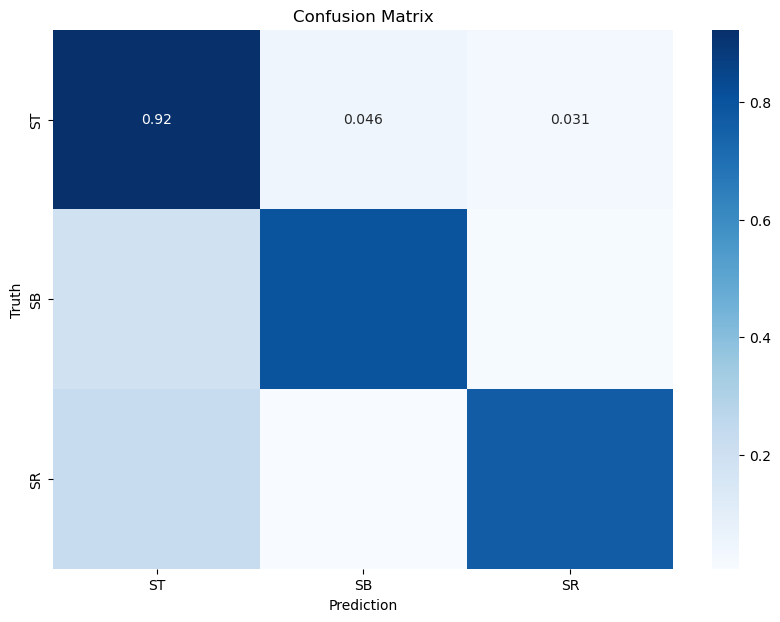

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

model__1.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model__1(images.to(device))
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
df_cm = pd.DataFrame(cm, index=["ST", "SB", "SR"], columns=["ST", "SB", "SR"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()




In [24]:

#Classification Report for Test Data:

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["ST", "SB", "SR"]))


              precision    recall  f1-score   support

          ST       0.70      0.92      0.80      1037
          SB       0.93      0.80      0.86       970
          SR       0.94      0.77      0.85       993

    accuracy                           0.83      3000
   macro avg       0.86      0.83      0.83      3000
weighted avg       0.86      0.83      0.83      3000



Average precision score, micro-averaged over all classes: 0.75


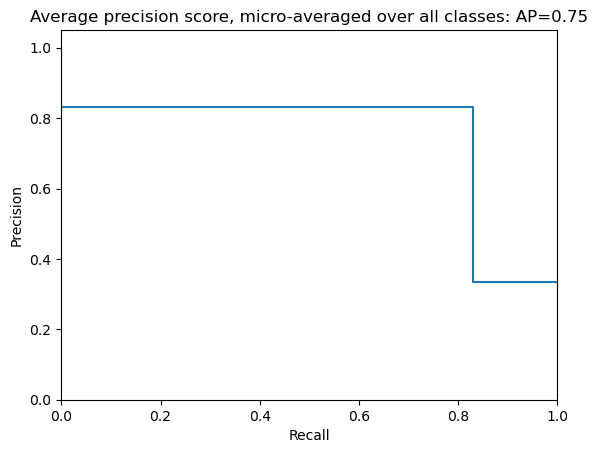

In [25]:
# presicion recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve((np.array(y_true) == i).astype(int),
                                                        (np.array(y_pred) == i).astype(int))
    average_precision[i] = average_precision_score((np.array(y_true) == i).astype(int), (np.array(y_pred) == i).astype(int))

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(np.eye(3)[y_true].ravel(),
    np.eye(3)[y_pred].ravel())
average_precision["micro"] = average_precision_score(np.eye(3)[y_true], np.eye(3)[y_pred],
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
        .format(average_precision["micro"]))
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()

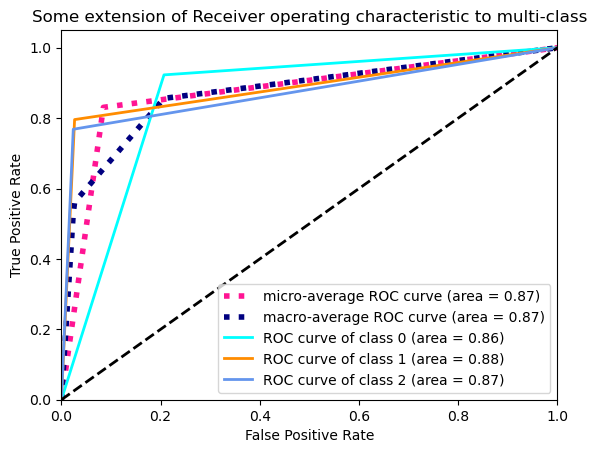

In [26]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test = label_binarize(y_true, classes=[0, 1, 2])
y_score = label_binarize(y_pred, classes=[0, 1, 2])


n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



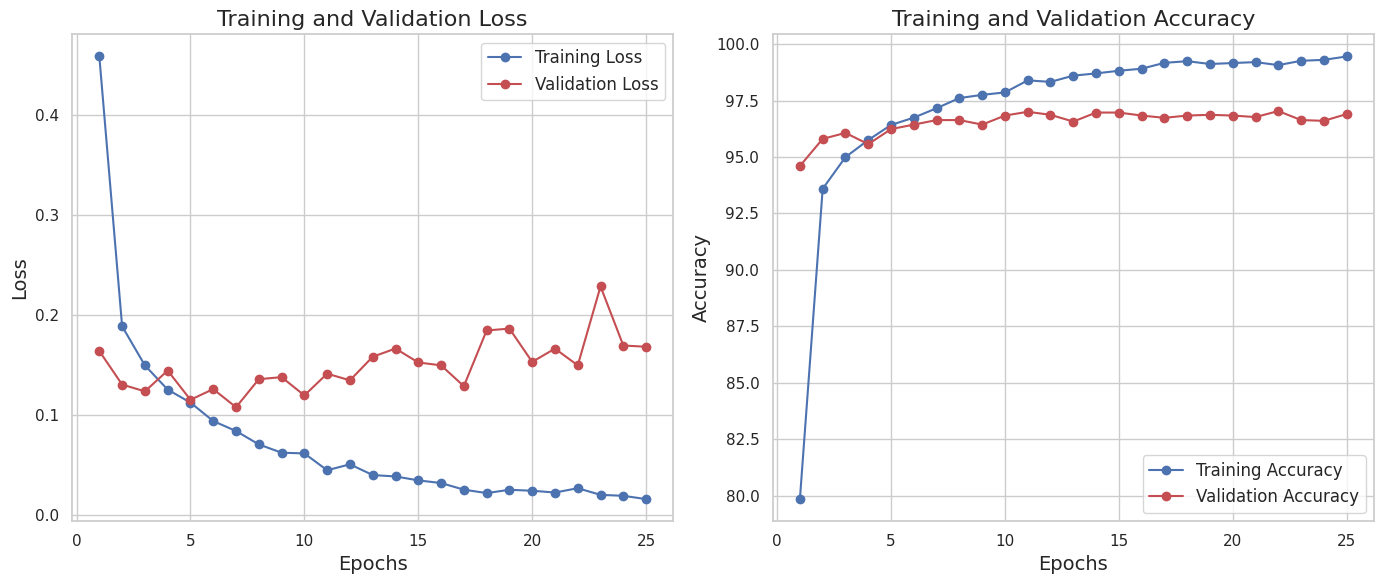

In [ ]:
from plots import accuracy_and_validation_plots


# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, len(train_losses_list)+1))

accuracy_and_validation_plots(epochs_, train_losses_list, test_losses_list, accuracy_train_list,accuracy_test_list).plot_figure("accuracy.png")


## 7 classes

In [5]:
import os
os.chdir('D:\LARGE_CNN\ECG_ML\MAIN\zenodo_data\cg_16')

In [6]:
# all 7 classes

data_1dAVB_list=[]
for i in range(6):
    cc = np.loadtxt('disease_1dAVB_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_1dAVB_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data 1dAVB of length {len(cc)} in {i} index loaded")
print(data_1dAVB_list[0].shape)

data_AF_list=[]
for i in range(6):
    cc = np.loadtxt('disease_AF_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_AF_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data AF of length {len(cc)} in {i} index loaded")
print(data_AF_list[0].shape)

data_LBBB_list=[]
for i in range(6):
    cc = np.loadtxt('disease_LBBB_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_LBBB_list.append(cc)
    
    print(cc.shape)
    print(f"data LBBB of length {len(cc)} in {i} index loaded")
print(data_LBBB_list[0].shape)

data_normal_list=[]
for i in range(6):
    cc = np.loadtxt('disease_normal_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_normal_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data normal of length {len(cc)} in {i} index loaded")
print(data_normal_list[0].shape)


data_RBBB_list=[]
for i in range(6):
    cc = np.loadtxt('disease_RBBB_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_RBBB_list.append(cc)

    print(cc.shape)
    print(f"data RBBB of length {len(cc)} in {i} index loaded")
print(data_RBBB_list[0].shape)

data_SB_list=[]
for i in range(6):
    cc = np.loadtxt('disease_SB_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_SB_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data SB of length {len(cc)} in {i} index loaded")
print(data_SB_list[0].shape)

data_ST_list=[]
for i in range(6):
    cc = np.loadtxt('disease_ST_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_ST_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data ST of length {len(cc)} in {i} index loaded")
print(data_ST_list[0].shape)


(500, 65536)
data 1dAVB of length 500 in 0 index loaded
(500, 65536)
data 1dAVB of length 500 in 1 index loaded
(500, 65536)
data 1dAVB of length 500 in 2 index loaded
(500, 65536)
data 1dAVB of length 500 in 3 index loaded
(500, 65536)
data 1dAVB of length 500 in 4 index loaded
(500, 65536)
data 1dAVB of length 500 in 5 index loaded
(500, 65536)
(500, 65536)
data AF of length 500 in 0 index loaded
data AF of length 500 in 1 index loaded
data AF of length 500 in 2 index loaded
data AF of length 500 in 3 index loaded
data AF of length 500 in 4 index loaded
data AF of length 500 in 5 index loaded
(500, 65536)
(500, 65536)
data LBBB of length 500 in 0 index loaded
(500, 65536)
data LBBB of length 500 in 1 index loaded
(500, 65536)
data LBBB of length 500 in 2 index loaded
(500, 65536)
data LBBB of length 500 in 3 index loaded
(500, 65536)
data LBBB of length 500 in 4 index loaded
(500, 65536)
data LBBB of length 500 in 5 index loaded
(500, 65536)
(500, 65536)
data normal of length 500 in 

In [7]:
from tqdm import tqdm

data_AF_list=[]
for i in range(5):
    cc = np.loadtxt('disease_AF_svd_zenedo_cg_16_'+str(i)+'.txt')
    data_AF_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data AF of length {len(cc)} in {i} index loaded")
cc = np.loadtxt('disease_AF_svd_zenedo_cg_16_'+str(7)+'.txt')
data_AF_list.append(cc)
print(data_AF_list[0].shape)


(500, 65536)
data AF of length 500 in 0 index loaded
data AF of length 500 in 1 index loaded
data AF of length 500 in 2 index loaded
data AF of length 500 in 3 index loaded
data AF of length 500 in 4 index loaded
(500, 65536)


In [8]:
for i, item in enumerate(data_AF_list):
    for j in tqdm(range(item.shape[0])):
        if np.isnan(np.sum(item[j])):
            print(i)
            print(j)

100%|██████████| 500/500 [00:00<00:00, 8928.72it/s]


#### batches

In [13]:
labels=np.concatenate((np.zeros(3000),np.ones(3000),2*np.ones(3000),3*np.ones(3000),4*np.ones(3000),5*np.ones(3000),6*np.ones(3000)))
images=np.concatenate((np.resize(data_1dAVB_list,(3000,1,256,256)),np.resize(data_AF_list,(3000,1,256,256)),np.resize(data_LBBB_list,(3000,1,256,256)),np.resize(data_normal_list,(3000,1,256,256)),np.resize(data_RBBB_list,(3000,1,256,256)),np.resize(data_SB_list,(3000,1,256,256)),np.resize(data_ST_list,(3000,1,256,256))))
#del data_1dAVB_list,data_AF_list,data_LBBB_list,data_normal_list,data_RBBB_list,data_SB_list,data_ST_list

#default_directory()
print(len(images),len(labels))
print(f"images shape: {images.shape}")

21000 21000
images shape: (21000, 1, 256, 256)


In [14]:
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
del images_train, images_test, labels_train, labels_test ,images, labels ,train_dataset, test_dataset


#### model

In [15]:
class  smallCNN_zenedo7class(nn.Module):
    def __init__(self):
        super( smallCNN_zenedo7class, self).__init__()
        
        # Convolutional layers with reduced filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers with reduced neurons
        self.fc1 = nn.Linear(64 * 32 * 32, 256)  # Adjusted for 256x256 input
        self.fc2 = nn.Linear(256, 7)  # Changed to 7 output neurons
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 128x128
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 64x64
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 32x32
        
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 64 * 32 * 32)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x
    
class smallCNN_zenedo7class_V1(nn.Module):
    def __init__(self):
        super(smallCNN_zenedo7class_V1, self).__init__()
        
        # Convolutional layers with increased filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers with increased neurons
        self.fc1 = nn.Linear(128 * 32 * 32, 512)  # Adjusted for 256x256 input
        self.fc2 = nn.Linear(512, 7)  # Changed to 7 output neurons
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 128x128
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 64x64
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 32x32
        
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 128 * 32 * 32)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x
    
class smallCNN_zenedo7class_V2(nn.Module):
    def __init__(self):
        super(smallCNN_zenedo7class_V2, self).__init__()
        
        # Convolutional layers with increased filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers with increased neurons
        self.fc1 = nn.Linear(128 * 32 * 32, 4092)  # Adjusted for 256x256 input
        self.fc2 = nn.Linear(4092, 1024)  # Adjusted for 256x256 input
        self.fc3 = nn.Linear(1024, 512)  # Adjusted for 256x256 input
        self.fc4 = nn.Linear(512, 7)  # Adjusted for 256x256 input
        # self.fc5 = nn.Linear(4096, 1024)  # Adjusted for 256x256 input
        # self.fc6 = nn.Linear(1024, 512)  # Adjusted for 256x256 input
        # self.fc7 = nn.Linear(512, 7)  # Changed to 7 output neurons
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 128x128
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 64x64
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 32x32
        
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 128 * 32 * 32)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        # x = self.dropout(x)
        # x = F.relu(self.fc5(x))
        # x = self.dropout(x)
        # x = F.relu(self.fc6(x))
        # x = self.dropout(x)
        # x = self.fc7(x)
        
        return x
    
class  smallCNN_zenedo7class_V3(nn.Module):
    def __init__(self):
        super( smallCNN_zenedo7class_V3, self).__init__()
        
        # Convolutional layers with reduced filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers with reduced neurons
        self.fc1 = nn.Linear(64 * 32 * 32, 8192)  # Adjusted for 256x256 input
        self.fc2 = nn.Linear(8192,1024)  # Adjusted for 256x256 input
        self.fc3 = nn.Linear(1024, 256)  # Adjusted for 256x256 input
        self.fc4 = nn.Linear(256, 7)  # Changed to 7 output neurons
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 128x128
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 64x64
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 32x32
        
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 64 * 32 * 32)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)

        
        return x

In [44]:
torch.manual_seed(42)  # Set seed for reproducibility
for i, (images, labels) in enumerate(train_dataloader):
    images, labels = images.to(device), labels.to(device)
    
    # Check for invalid data
    if torch.isnan(images).any() or torch.isinf(images).any():
        print(f"Invalid data found in images at batch {i}")
        koila=images
        loila=labels

# check invalid data in koila
tempo=-1
for i in koila:
    tempo+=1
    if torch.isnan(i).any() or torch.isinf(i).any():
        print(f"Invalid data found in images at batch {i},  {tempo}")

Invalid data found in images at batch 482
Invalid data found in images at batch tensor([[[nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         ...,
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan]]]),  19


In [46]:
loila[tempo]

tensor(5)

In [42]:
print(koila)

tensor([[[[-2.1932e-02, -2.3095e-02, -2.3440e-02,  ...,  9.9339e-02,
            1.3987e-01,  1.8798e-01],
          [-3.7452e-02, -3.4851e-02, -3.1810e-02,  ...,  1.1739e-01,
            1.7238e-01,  2.3838e-01],
          [-6.2322e-02, -5.7678e-02, -5.2308e-02,  ...,  1.5304e-01,
            2.3522e-01,  3.3530e-01],
          ...,
          [ 2.2106e-01,  1.6864e-01,  1.2426e-01,  ..., -2.2884e-01,
           -3.6425e-01, -5.2734e-01],
          [ 9.7660e-02,  8.4417e-02,  7.1344e-02,  ..., -1.7727e-01,
           -2.8670e-01, -4.2415e-01],
          [ 5.9315e-02,  6.9734e-02,  7.4705e-02,  ..., -1.8407e-01,
           -2.9100e-01, -4.2897e-01]]],


        [[[-2.6058e-03, -2.1351e-03, -1.6947e-03,  ..., -1.0489e-03,
           -7.8939e-05,  1.1585e-03],
          [-2.6058e-03, -2.1351e-03, -1.6947e-03,  ..., -1.0489e-03,
           -7.8939e-05,  1.1585e-03],
          [-2.6058e-03, -2.1351e-03, -1.6947e-03,  ..., -1.0489e-03,
           -7.8939e-05,  1.1585e-03],
          ...,
   

#### model training

In [104]:
"""this will run when there is no invalid sample   
****ignore it***********************"""


torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__1 =  smallCNN_zenedo7class().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.Adam(model__1.parameters(), lr=0.001)  

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__1.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        
        outputs = model__1(images)
        loss = criterion(outputs, labels)
        # print(loss.item(),"index=",i) #########
        
        # Backward pass and optimization
        optimizer.zero_grad() # for efficency

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__1.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__1(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/50], Train Loss: 1.8315, Test Loss: 1.4072, Train Accuracy: 32.6488, Test Accuracy: 43.0398
Epoch [2/50], Train Loss: 1.5071, Test Loss: 1.2799, Train Accuracy: 38.6012, Test Accuracy: 51.7519
Epoch [3/50], Train Loss: 1.4577, Test Loss: 1.1594, Train Accuracy: 40.8214, Test Accuracy: 55.7055
Epoch [4/50], Train Loss: 1.4087, Test Loss: 1.1491, Train Accuracy: 42.5119, Test Accuracy: 56.6998
Epoch [5/50], Train Loss: 1.3824, Test Loss: 1.0910, Train Accuracy: 43.6607, Test Accuracy: 63.4470
Epoch [6/50], Train Loss: 1.3612, Test Loss: 1.0995, Train Accuracy: 46.0179, Test Accuracy: 61.3636
Epoch [7/50], Train Loss: 1.2811, Test Loss: 1.0505, Train Accuracy: 50.6548, Test Accuracy: 64.4886
Epoch [8/50], Train Loss: 1.2182, Test Loss: 0.9846, Train Accuracy: 54.6964, Test Accuracy: 68.3239
Epoch [9/50], Train Loss: 1.1697, Test Loss: 0.9158, Train Accuracy: 56.1905, Test Accuracy: 75.4498
Epoch [10/50], Train Loss: 1.1332, Test Loss: 0.9275, Train Accuracy: 57.2381, Test Accurac

In [105]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, optimizer, and scheduler
model__1 = smallCNN_zenedo7class().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model__1.parameters(), lr=0.001)  # Reduced learning rate
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []
invalid_images=[]
invalid_images_lable=[]
for epoch in range(num_epochs):
    model__1.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Check for invalid data
        if torch.isnan(images).any() or torch.isinf(images).any():
            print(f"Invalid data found in images at batch {i}")

            invalid_images.append(images)
            invalid_images_lable.append(labels)

            continue
        if torch.isnan(labels).any() or torch.isinf(labels).any():
            print(f"Invalid data found in labels at batch {i}")
            continue

        
        
        optimizer.zero_grad()
        outputs = model__1(images)
        
        # Check for invalid outputs
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            print(f"Invalid data found in outputs at batch {i}")
            continue
        
        loss = criterion(outputs, labels)
        
        # Check for invalid loss
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print(f"Invalid data found in loss at batch {i}")
            continue
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model__1.parameters(), max_norm=1.0)
        
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__1.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model__1(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    
    test_losses_list.append(test_loss / len(test_dataloader))
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/50], Train Loss: 1.4788, Test Loss: 0.8940, Train Accuracy: 50.1548, Test Accuracy: 69.8627
Epoch [2/50], Train Loss: 0.9706, Test Loss: 0.7624, Train Accuracy: 63.8095, Test Accuracy: 74.1004
Epoch [3/50], Train Loss: 0.8802, Test Loss: 0.7200, Train Accuracy: 67.7857, Test Accuracy: 74.6922
Epoch [4/50], Train Loss: 0.8321, Test Loss: 0.6921, Train Accuracy: 69.8095, Test Accuracy: 76.7282
Epoch [5/50], Train Loss: 0.7916, Test Loss: 0.6710, Train Accuracy: 71.2321, Test Accuracy: 77.4148
Epoch [6/50], Train Loss: 0.7666, Test Loss: 0.6431, Train Accuracy: 72.6071, Test Accuracy: 77.5805
Epoch [7/50], Train Loss: 0.7275, Test Loss: 0.6246, Train Accuracy: 73.7798, Test Accuracy: 79.3561
Epoch [8/50], Train Loss: 0.7009, Test Loss: 0.6039, Train Accuracy: 75.4107, Test Accuracy: 80.8475
Epoch [9/50], Train Loss: 0.6723, Test Loss: 0.5803, Train Accuracy: 76.3452, Test Accuracy: 80.1373
Epoch [10/50], Train Loss: 0.6466, Test Loss: 0.5675, Train Accuracy: 77.7500, Test Accurac

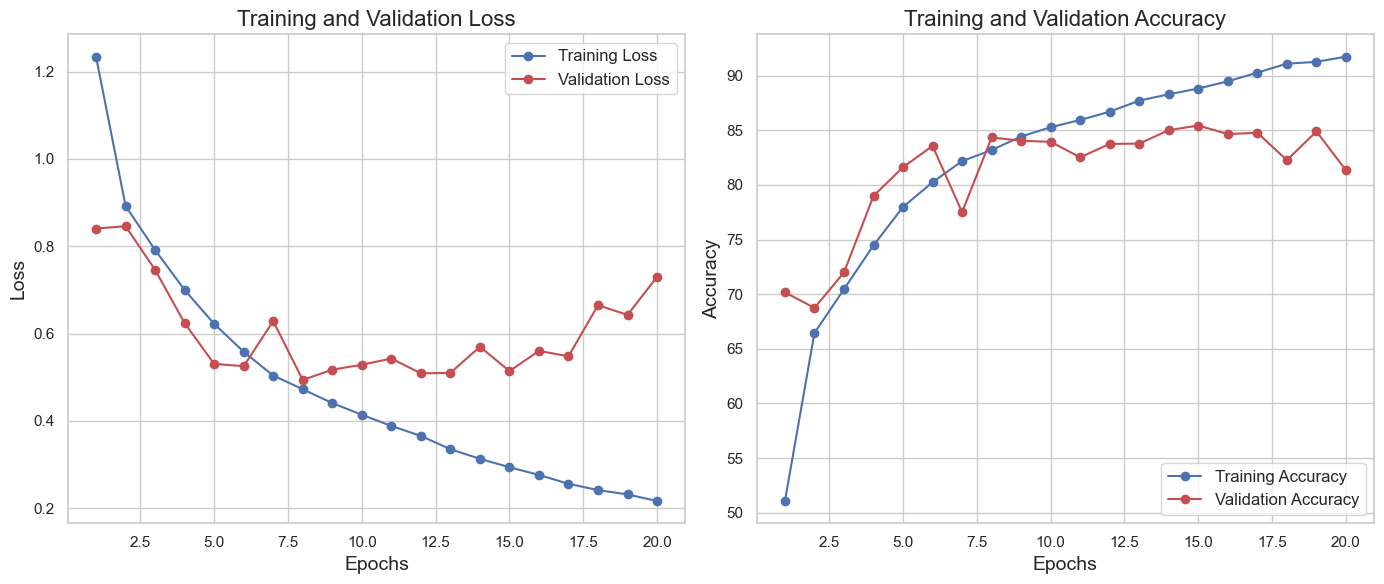

In [68]:
from plots import accuracy_and_validation_plots


# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, len(train_losses_list)+1))

accuracy_and_validation_plots(epochs_, train_losses_list, test_losses_list, accuracy_train_list,accuracy_test_list).plot_figure("accuracy.png")


In [67]:

model__1.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model__1(images.to(device))
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
df_cm = pd.DataFrame(cm, index=["ST", "SB", "SR","AF","LBBB","RBBB","1dAVB"], columns=["ST", "SB", "SR","AF","LBBB","RBBB","1dAVB"])


In [65]:
df_cm

,ST,SB,SR,AF,LBBB,RBBB,1dAVB
ST,0.724382,0.125442,0.081272,0.001767,0.067138,0.0,0.000000
SB,0.039872,0.858054,0.049442,0.004785,0.033493,0.0,0.014354
SR,0.046699,0.067633,0.859903,0.001610,0.006441,0.0,0.017713
AF,0.136207,0.093103,0.005172,0.725862,0.001724,0.0,0.037931
LBBB,0.084800,0.176000,0.027200,0.012800,0.684800,0.0,0.014400
RBBB,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
1dAVB,0.005236,0.102967,0.033159,0.000000,0.012216,0.0,0.846422


#### v1


In [74]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, optimizer, and scheduler
model__1 = smallCNN_zenedo7class_V1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model__1.parameters(), lr=0.001)  # Reduced learning rate
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 10
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []
invalid_images=[]
invalid_images_lable=[]
for epoch in range(num_epochs):
    model__1.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Check for invalid data
        if torch.isnan(images).any() or torch.isinf(images).any():
            print(f"Invalid data found in images at batch {i}")

            invalid_images.append(images)
            invalid_images_lable.append(labels)

            continue
        if torch.isnan(labels).any() or torch.isinf(labels).any():
            print(f"Invalid data found in labels at batch {i}")
            continue

        
        
        optimizer.zero_grad()
        outputs = model__1(images)
        
        # Check for invalid outputs
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            print(f"Invalid data found in outputs at batch {i}")
            continue
        
        loss = criterion(outputs, labels)
        
        # Check for invalid loss
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print(f"Invalid data found in loss at batch {i}")
            continue
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model__1.parameters(), max_norm=1.0)
        
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__1.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model__1(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    
    test_losses_list.append(test_loss / len(test_dataloader))
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Invalid data found in images at batch 291
Epoch [1/10], Train Loss: 1.6782, Test Loss: 1.4625, Train Accuracy: 37.1488, Test Accuracy: 52.4858
Invalid data found in images at batch 179
Epoch [2/10], Train Loss: 1.3966, Test Loss: 1.2791, Train Accuracy: 49.6071, Test Accuracy: 59.2566
Invalid data found in images at batch 75
Epoch [3/10], Train Loss: 1.2563, Test Loss: 1.1825, Train Accuracy: 54.8095, Test Accuracy: 60.4403
Invalid data found in images at batch 246
Epoch [4/10], Train Loss: 1.1697, Test Loss: 1.1060, Train Accuracy: 58.5000, Test Accuracy: 63.6837
Invalid data found in images at batch 477
Epoch [5/10], Train Loss: 1.1065, Test Loss: 1.0523, Train Accuracy: 60.2679, Test Accuracy: 64.8674
Invalid data found in images at batch 516
Epoch [6/10], Train Loss: 1.0552, Test Loss: 1.0111, Train Accuracy: 62.7381, Test Accuracy: 66.6193
Invalid data found in images at batch 510
Epoch [7/10], Train Loss: 1.0113, Test Loss: 0.9811, Train Accuracy: 64.5238, Test Accuracy: 67.5426


## V2

In [116]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, optimizer, and scheduler
model__1 = smallCNN_zenedo7class_V2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model__1.parameters(), lr=0.001)  # Reduced learning rate
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []
invalid_images=[]
invalid_images_lable=[]
for epoch in range(num_epochs):
    model__1.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Check for invalid data
        if torch.isnan(images).any() or torch.isinf(images).any():
            print(f"Invalid data found in images at batch {i}")

            invalid_images.append(images)
            invalid_images_lable.append(labels)

            continue
        if torch.isnan(labels).any() or torch.isinf(labels).any():
            print(f"Invalid data found in labels at batch {i}")
            continue

        
        
        optimizer.zero_grad()
        outputs = model__1(images)
        
        # Check for invalid outputs
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            print(f"Invalid data found in outputs at batch {i}")
            continue
        
        loss = criterion(outputs, labels)
        
        # Check for invalid loss
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print(f"Invalid data found in loss at batch {i}")
            continue
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model__1.parameters(), max_norm=1.0)
        
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__1.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model__1(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    
    test_losses_list.append(test_loss / len(test_dataloader))
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/50], Train Loss: 2.0636, Test Loss: 1.9459, Train Accuracy: 14.5119, Test Accuracy: 13.3996
Epoch [2/50], Train Loss: 1.9482, Test Loss: 1.9459, Train Accuracy: 14.4821, Test Accuracy: 13.3996
Epoch [3/50], Train Loss: 1.9463, Test Loss: 1.9459, Train Accuracy: 14.4881, Test Accuracy: 13.3996


KeyboardInterrupt: 

## V3

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, optimizer, and scheduler
model__1 = smallCNN_zenedo7class_V3().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model__1.parameters(), lr=0.01)  # Reduced learning rate
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []
invalid_images=[]
invalid_images_lable=[]
for epoch in range(num_epochs):
    model__1.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Check for invalid data
        if torch.isnan(images).any() or torch.isinf(images).any():
            print(f"Invalid data found in images at batch {i}")

            invalid_images.append(images)
            invalid_images_lable.append(labels)

            continue
        if torch.isnan(labels).any() or torch.isinf(labels).any():
            print(f"Invalid data found in labels at batch {i}")
            continue

        
        
        optimizer.zero_grad()
        outputs = model__1(images)
        
        # Check for invalid outputs
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            print(f"Invalid data found in outputs at batch {i}")
            continue
        
        loss = criterion(outputs, labels)
        
        # Check for invalid loss
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print(f"Invalid data found in loss at batch {i}")
            continue
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model__1.parameters(), max_norm=1.0)
        
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__1.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model__1(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    
    test_losses_list.append(test_loss / len(test_dataloader))
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

c:\Users\Guest1\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch [1/50], Train Loss: 95.8053, Test Loss: 1.9466, Train Accuracy: 14.2500, Test Accuracy: 14.8674
Epoch [2/50], Train Loss: 6.1198, Test Loss: 1.9481, Train Accuracy: 14.1607, Test Accuracy: 13.6364
Epoch [3/50], Train Loss: 2.1324, Test Loss: 1.9461, Train Accuracy: 14.2024, Test Accuracy: 14.8674
Epoch [4/50], Train Loss: 2.0669, Test Loss: 1.9480, Train Accuracy: 14.0298, Test Accuracy: 13.9441
Epoch [5/50], Train Loss: 2.0710, Test Loss: 1.9467, Train Accuracy: 14.4524, Test Accuracy: 13.6364
Epoch [6/50], Train Loss: 1.9473, Test Loss: 1.9466, Train Accuracy: 14.3036, Test Accuracy: 14.4650
Epoch [7/50], Train Loss: 1.9471, Test Loss: 1.9476, Train Accuracy: 13.9821, Test Accuracy: 13.6364
Epoch [8/50], Train Loss: 1.9470, Test Loss: 1.9467, Train Accuracy: 14.2798, Test Accuracy: 13.6364
Epoch [9/50], Train Loss: 1.9467, Test Loss: 1.9474, Train Accuracy: 14.3095, Test Accuracy: 13.3996
Epoch [10/50], Train Loss: 1.9473, Test Loss: 1.9463, Train Accuracy: 14.0060, Test Accura